In [1]:
import mysql.connector as sql
import pandas as pd
import datetime as dt
import numpy as np
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
import matplotlib.pyplot as plt
import math
import json
from pandas.io.json import json_normalize
import requests
import matplotlib.dates as mdates
from datetime import date, timedelta

In [2]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

visits = pd.read_sql('SELECT * FROM Visits', con=db_connection)
visits['created'] = pd.to_datetime(visits['created'], unit='s')
visits['lastmodified'] = pd.to_datetime(visits['lastmodified'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['registered'] = visits['registered'].replace(0, np.nan)
visits['registered'] = pd.to_datetime(visits['registered'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['deleted'] = visits['deleted'].replace(0, np.nan)
visits['deleted'] = pd.to_datetime(visits['deleted'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['paired'] = visits['paired'].replace(0, np.nan)
visits['paired'] = pd.to_datetime(visits['paired'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
visits['created_ip'].replace(0, np.nan, inplace=True)
visits['registered_ip'].replace(0, np.nan, inplace=True)
visits['paired_ip'].replace(0, np.nan, inplace=True)
# visits['processed'].replace(0, np.nan, inplace=True)
visits['exported'].replace(0, np.nan, inplace=True)
visits['title'].fillna(value=np.nan, inplace=True)
visits['note'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)

In [3]:
visits= visits[visits['created'] > '2014']

In [4]:
visits_opening_hours = visits.set_index('created')
visits_opening_hours = visits_opening_hours.between_time('10:00', '18:00')

# How many open account?

In [23]:
visits_zero = visits_opening_hours[visits_opening_hours['user_id'] == 0]
visits_zero['id'].count() / visits_opening_hours['id'].count() *100
#the post engagemnet is 3.3% 

96.33636037080684

In [24]:
visits_no_zero = visits[visits['user_id'] != 0]
visits_no_zero

,id,shortcode,user_id,created,lastmodified,registered,expires,paired,ticket,deleted,created_ip,registered_ip,paired_ip,processed,purchased_by_user_id,note,exported,first_accessed,ignore_first_accessed,title
10,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 17:57:38-05:00,2014-11-03 16:13:10-05:00,0,2014-11-03 16:32:25-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""...",2015-01-30 23:17:27-05:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
28,797837,2014114u142,142,2014-11-04 20:32:36,2016-02-23 17:57:38-05:00,2014-11-04 15:32:37-05:00,0,2014-11-04 15:36:04-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""797837"",""...",NaT,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
31,798159,oriolsTicket,247,2014-11-05 00:59:08,2016-02-23 17:57:38-05:00,2014-11-04 19:59:08-05:00,0,2014-11-05 18:16:31-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""798159"",""...",2015-01-30 23:17:25-05:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
179,1511605,g2qd,9878,2014-12-19 20:18:32,2016-02-23 17:57:40-05:00,2014-12-19 15:18:33-05:00,0,2016-02-21 13:25:44-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""1511605"",...",NaT,NaN,NaN,1.245905e+09,1456079151,0,NaN,NaN,NaN,1.0,NaN
187,1513173,oriolsNewTicket,247,2015-01-06 21:19:51,2016-02-23 17:57:40-05:00,2015-01-06 16:19:51-05:00,0,2015-01-06 16:29:28-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""1513173"",...",2015-01-30 23:17:22-05:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716269,132498395,d3wwv,28814,2020-04-22 20:50:05,2020-04-28 01:52:34-04:00,2020-04-22 16:50:17-04:00,0,2020-04-28 01:52:34-04:00,"{""status"":""Attendance recorded for ticket: 940...",NaT,1.198075e+09,1.198075e+09,1.198075e+09,1588053154,0,NaN,NaN,1.587589e+09,NaN,NaN
716270,132498415,dnwy,28814,2020-04-22 21:50:12,2020-04-22 21:06:42-04:00,2020-04-22 17:50:22-04:00,0,2020-04-22 21:06:41-04:00,"{""status"":""Attendance recorded for ticket: 940...",NaT,1.198075e+09,1.198075e+09,1.198075e+09,1587604002,0,NaN,NaN,1.587593e+09,NaN,NaN
716273,132777659,ppkxy,28814,2020-07-02 17:15:41,2020-07-02 13:21:25-04:00,2020-07-02 13:18:28-04:00,0,2020-07-02 13:21:25-04:00,"{""status"":""Attendance recorded for ticket: 940...",NaT,1.198075e+09,1.198075e+09,1.198075e+09,0,0,NaN,NaN,1.593710e+09,NaN,NaN
716274,132777661,k326zy,28814,2020-07-02 17:15:50,2020-07-22 16:26:23-04:00,NaT,0,2020-07-22 16:26:22-04:00,"{""ticket_id"":""940557"",""shortcode"":""k326zy"",""pe...",NaT,1.198075e+09,NaN,1.198075e+09,1595449583,0,NaN,NaN,1.593722e+09,NaN,NaN


In [25]:
visits_no_zero_unique= visits_no_zero[~visits_no_zero['user_id'].duplicated()]
visits_no_zero_unique
#21058 unique accounts

,id,shortcode,user_id,created,lastmodified,registered,expires,paired,ticket,deleted,created_ip,registered_ip,paired_ip,processed,purchased_by_user_id,note,exported,first_accessed,ignore_first_accessed,title
10,796435,2014113u247,247,2014-11-03 21:13:10,2016-02-23 17:57:38-05:00,2014-11-03 16:13:10-05:00,0,2014-11-03 16:32:25-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""796435"",""...",2015-01-30 23:17:27-05:00,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
28,797837,2014114u142,142,2014-11-04 20:32:36,2016-02-23 17:57:38-05:00,2014-11-04 15:32:37-05:00,0,2014-11-04 15:36:04-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""797837"",""...",NaT,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
179,1511605,g2qd,9878,2014-12-19 20:18:32,2016-02-23 17:57:40-05:00,2014-12-19 15:18:33-05:00,0,2016-02-21 13:25:44-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""1511605"",...",NaT,NaN,NaN,1.245905e+09,1456079151,0,NaN,NaN,NaN,1.0,NaN
193,1513947,r26z,158,2015-01-07 21:42:50,2016-02-23 17:57:40-05:00,2015-01-07 16:42:50-05:00,0,2015-01-20 14:56:10-05:00,"{""tessitura_spoofing"":1,""ticket_id"":""1513947"",...",NaT,NaN,NaN,NaN,0,0,NaN,NaN,NaN,1.0,NaN
210,1517519,x1jq,377,2015-01-26 16:53:25,2016-02-23 17:57:40-05:00,2015-01-26 11:53:26-05:00,0,2015-01-26 15:02:07-05:00,"{""status"":""Attendance recorded for ticket: 358...",NaT,NaN,NaN,NaN,1425864373,0,NaN,NaN,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715721,132206703,g5fnb,30980,2020-03-01 21:17:53,2020-08-10 22:16:51-04:00,2020-03-01 16:17:54-05:00,0,2020-08-10 22:16:51-04:00,"{""status"":""Attendance recorded for ticket: 938...",NaT,2.691693e+09,2.691693e+09,1.659532e+09,0,0,NaN,NaN,1.597083e+09,NaN,NaN
715994,132227925,xb3kq,30538,2020-03-03 21:11:04,2020-03-04 21:24:46-05:00,2020-03-03 16:11:05-05:00,0,2020-03-04 21:24:42-05:00,"{""status"":""Attendance recorded for ticket: 938...",NaT,2.691693e+09,2.691693e+09,1.248598e+09,1583375086,0,NaN,NaN,1.583327e+09,NaN,NaN
716005,132228003,pwdkh,30587,2020-03-03 21:15:29,2020-03-18 16:18:53-04:00,2020-03-03 16:15:30-05:00,0,2020-03-18 16:18:53-04:00,"{""status"":""Attendance recorded for ticket: 938...",NaT,2.691693e+09,2.691693e+09,1.813147e+09,0,0,NaN,NaN,1.584562e+09,NaN,NaN
716105,132237935,z5pns,30558,2020-03-04 14:56:37,2020-03-10 13:41:13-04:00,2020-03-04 09:56:38-05:00,0,2020-03-10 13:41:05-04:00,"{""status"":""Attendance recorded for ticket: 938...",NaT,2.691693e+09,2.691693e+09,2.176515e+09,1583862073,0,NaN,NaN,1.583862e+09,NaN,NaN


In [16]:
visits_no_zero_unique['id'].count() / visits['id'].count() *100
#3 percentage unique visitors open account  

2.939903557537394

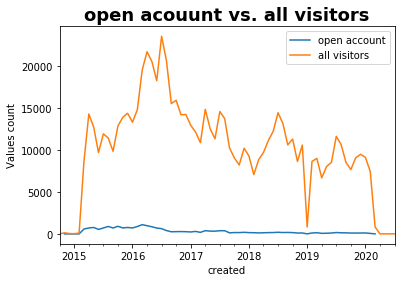

In [17]:
visits_engagment = visits_no_zero_unique['created'].groupby(visits_no_zero_unique.created.dt.to_period('M')).agg('count')
total_vists = visits['created'].groupby(visits.created.dt.to_period('M')).agg('count')
visits_engagment.plot(title='unique visitors that visit online')
total_vists.plot(title='total unique visitors')
plt.title('open acouunt vs. all visitors', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend(['open account', 'all visitors'])
#the post engagement in relation to the rest of the visits
# plt.savefig('post_engagement_vs_all.png', dpi=300)

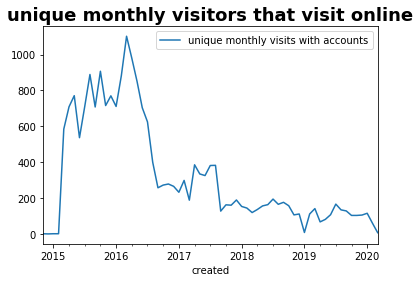

In [18]:
visits_engagment = visits_no_zero_unique['created'].groupby(visits_no_zero_unique.created.dt.to_period('M')).agg('count')
total_vists = visits['created'].groupby(visits.created.dt.to_period('M')).agg('count')
visits_engagment.plot()
plt.title('unique monthly visitors that visit online', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.legend(['unique monthly visits with accounts'])
#the post engagement in relation to the rest of the visits
# plt.savefig('monthly_post_engagement.png', dpi=300)

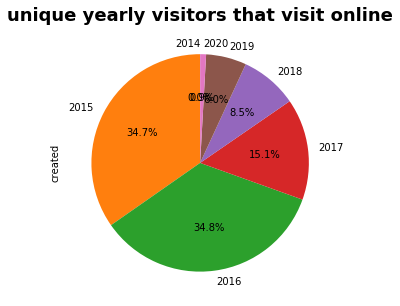

In [10]:
visits_engagment = visits_no_zero_unique['created'].groupby(visits_no_zero_unique.created.dt.to_period('Y')).agg('count')
plt.title('unique yearly visitors that visit online', fontdict={'fontweight': 'bold', 'fontsize':18})
visits_engagment.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
#percentage dividers of the post engagment users

# looking into post engagement without the visitors that collected nothing

In [5]:
db_connection = sql.connect(host='localhost', database='collection_visits', user='pandas', password='password')

pensActivity = pd.read_sql('SELECT * FROM PensActivity', con=db_connection)
pensActivity['created'] = pd.to_datetime(pensActivity['created'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
pensActivity['lastmodified'] = pd.to_datetime(pensActivity['lastmodified'], unit='s').dt.tz_localize('utc').dt.tz_convert('US/Eastern')
pensActivity['created'].replace(0, np.nan, inplace=True)
pensActivity['lastmodified'].replace(0, np.nan, inplace=True)
pensActivity['notes'].replace(r'^\s*$', np.NaN, regex=True, inplace=True)
pensActivity['notes'] = pensActivity['notes'].astype('category')
pensActivity.sort_values(by='created', inplace=True)

In [6]:
pensActivity = pensActivity[pensActivity['created'] > '2014']

In [7]:
activity_openhours = pensActivity.set_index('created')
activity_openhours = activity_openhours.between_time('10:00', '18:00')

In [8]:
activity_openhours.reset_index(inplace=True)
pensActivity_clean = activity_openhours[['visit_id', 'created', 'count_items']]
visitors_did_something = pensActivity_clean[pensActivity_clean['count_items'] != 0]
visitors_did_something

,visit_id,created,count_items
0,1509709,2014-12-15 10:32:19-05:00,2
1,1509661,2014-12-15 10:52:19-05:00,7
2,1509705,2014-12-15 10:56:09-05:00,5
3,1509665,2014-12-15 10:56:30-05:00,6
4,1509687,2014-12-15 10:58:11-05:00,6
...,...,...,...
780832,132770927,2020-07-01 17:09:54-04:00,1
780833,132770927,2020-07-01 17:17:27-04:00,1
780834,132777659,2020-07-02 13:19:11-04:00,1
780835,132777683,2020-07-02 16:22:39-04:00,1


In [9]:
visits_opening_hours.reset_index(inplace=True)
visits_clean = visits_opening_hours[['id', 'shortcode', 'user_id', 'created']]
visits_clean = visits_clean.rename({'id': 'visit_id'},axis=1)
visits_clean

,visit_id,shortcode,user_id,created
0,796959,2014114u3,0,2014-11-04 12:25:24
1,797007,4444555544448,0,2014-11-04 15:20:54
2,798245,2014115u247,0,2014-11-05 16:21:53
3,814815,4444111,0,2014-11-12 17:40:40
4,815709,kikilll,0,2014-11-12 17:57:13
...,...,...,...,...
317357,132806719,56bs6,0,2020-07-09 13:11:50
317358,132806727,cvszd,0,2020-07-09 13:16:19
317359,132806735,zrbqg,0,2020-07-09 13:19:41
317360,132806749,Jr656,0,2020-07-09 13:40:43


In [10]:
activity_visits = pensActivity_clean.merge(visits_clean, on='visit_id', how='right', suffixes=('_activity', '_visits'))
activity_visits

,visit_id,created_activity,count_items,shortcode,user_id,created_visits
0,1509661,2014-12-15 10:52:19-05:00,7.0,sx6w,0,2014-12-15 14:48:33
1,1509661,2014-12-15 16:42:02-05:00,4.0,sx6w,0,2014-12-15 14:48:33
2,1509665,2014-12-15 10:56:30-05:00,6.0,cwzn,0,2014-12-15 14:49:47
3,1509665,2014-12-15 16:45:35-05:00,8.0,cwzn,0,2014-12-15 14:49:47
4,1509665,2015-01-07 14:24:55-05:00,20.0,cwzn,0,2014-12-15 14:49:47
...,...,...,...,...,...,...
490084,132806719,NaT,NaN,56bs6,0,2020-07-09 13:11:50
490085,132806727,NaT,NaN,cvszd,0,2020-07-09 13:16:19
490086,132806735,NaT,NaN,zrbqg,0,2020-07-09 13:19:41
490087,132806749,NaT,NaN,Jr656,0,2020-07-09 13:40:43


In [11]:
activity_visits['count_items'].fillna(value=0, inplace=True)
activity_visits

,visit_id,created_activity,count_items,shortcode,user_id,created_visits
0,1509661,2014-12-15 10:52:19-05:00,7.0,sx6w,0,2014-12-15 14:48:33
1,1509661,2014-12-15 16:42:02-05:00,4.0,sx6w,0,2014-12-15 14:48:33
2,1509665,2014-12-15 10:56:30-05:00,6.0,cwzn,0,2014-12-15 14:49:47
3,1509665,2014-12-15 16:45:35-05:00,8.0,cwzn,0,2014-12-15 14:49:47
4,1509665,2015-01-07 14:24:55-05:00,20.0,cwzn,0,2014-12-15 14:49:47
...,...,...,...,...,...,...
490084,132806719,NaT,0.0,56bs6,0,2020-07-09 13:11:50
490085,132806727,NaT,0.0,cvszd,0,2020-07-09 13:16:19
490086,132806735,NaT,0.0,zrbqg,0,2020-07-09 13:19:41
490087,132806749,NaT,0.0,Jr656,0,2020-07-09 13:40:43


In [12]:
did_something = activity_visits[activity_visits['count_items'] != 0] 
did_something['shortcode'].count()
#ppl that did something


402042

In [13]:
did_nothing = activity_visits[activity_visits['count_items'] == 0] 
did_nothing['shortcode'].count()

88047

In [14]:
have_account = activity_visits[activity_visits['user_id'] != 0]
have_account

,visit_id,created_activity,count_items,shortcode,user_id,created_visits
26,1517519,2015-01-26 11:54:42-05:00,1.0,x1jq,377,2015-01-26 16:53:25
27,1526919,2015-02-06 10:55:43-05:00,7.0,0g4g,247,2015-02-06 15:33:07
28,1526919,2015-02-06 10:55:46-05:00,1.0,0g4g,247,2015-02-06 15:33:07
29,1526919,2015-02-06 11:00:43-05:00,7.0,0g4g,247,2015-02-06 15:33:07
30,1526919,2015-02-06 11:03:20-05:00,7.0,0g4g,247,2015-02-06 15:33:07
...,...,...,...,...,...,...
489332,131907055,NaT,0.0,jm62b,30380,2020-02-11 15:12:34
489375,131918189,NaT,0.0,fpfdk,30391,2020-02-12 16:53:44
489405,131929435,NaT,0.0,mfkng,30425,2020-02-13 16:52:53
489678,132017405,NaT,0.0,6h4fw,1411,2020-02-18 17:26:39


In [15]:
did_something_and_have_account = did_something[did_something['user_id'] != 0]
did_something_and_have_account['shortcode'].count()

23040

In [16]:
#if you exclude ppl that did nothing from all the visits
have_account['shortcode'].count() / (activity_visits['shortcode'].count() - did_nothing['shortcode'].count()) * 100

5.865556334910283

In [17]:
have_account['shortcode'].count() / did_something['shortcode'].count() * 100
#ppl that have acount from all the visits / ppl that collected something no matter if they created account

5.865556334910283

In [18]:
have_account_unique = have_account[~have_account['user_id'].duplicated()]
did_something_unique = did_something[did_something['user_id'].duplicated()]
have_account_unique['shortcode'].count() / did_something_unique['shortcode'].count() * 100

2.7473355032229243

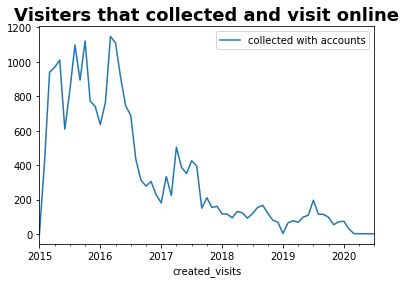

In [19]:
did_something_engagment_monthly = did_something_and_have_account['created_visits'].groupby(did_something_and_have_account.created_visits.dt.to_period('M')).agg('count')
did_something_engagment_monthly.plot()
plt.title('Visiters that collected and visit online', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.legend(['collected with accounts'])
# plt.savefig('monthly_post_engagement.png', dpi=300)

In [20]:
did_something_engagment_monthly.nlargest()
#the most engagement months

created_visits
2016-03    1148
2015-10    1121
2016-04    1109
2015-08    1098
2015-05    1010
Freq: M, Name: created_visits, dtype: int64

In [21]:
did_something_engagment_yearly = did_something_and_have_account['created_visits'].groupby(did_something_and_have_account.created_visits.dt.to_period('Y')).agg('count')
did_something_engagment_yearly = did_something_engagment_yearly.to_frame()

In [22]:
did_something_engagment_yearly.rename({'created_visits': 'value'}, axis=1, inplace=True)

In [24]:
did_something_engagment_yearly['total_visits'] = visits['created'].groupby(visits.created.dt.to_period('Y')).agg('count')
did_something_engagment_yearly

,value,total_visits
created_visits,,
2015,9408,119850
2016,7562,212266
2017,3487,140780
2018,1393,127028
2019,1079,98745
2020,111,17426


In [26]:
did_something_engagment_yearly['percentage'] = did_something_and_have_account['created_visits'].groupby(did_something_and_have_account.created_visits.dt.to_period('Y')).agg('count') / visits['created'].groupby(visits.created.dt.to_period('Y')).agg('count') *100
did_something_engagment_yearly= did_something_engagment_yearly[['value', 'total_visits', 'percentage']]
did_something_engagment_yearly

,value,total_visits,percentage
created_visits,,,
2015,9408,119850,7.849812
2016,7562,212266,3.562511
2017,3487,140780,2.476914
2018,1393,127028,1.096609
2019,1079,98745,1.092714
2020,111,17426,0.636979


In [32]:
did_something_engagment_yearly.rename({'value': 'total collected AND opened account'}, axis=1)

,total collected AND opened account,total_visits,percentage
created_visits,,,
2015,9408,119850,7.849812
2016,7562,212266,3.562511
2017,3487,140780,2.476914
2018,1393,127028,1.096609
2019,1079,98745,1.092714
2020,111,17426,0.636979


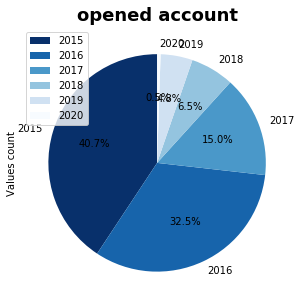

In [28]:
have_account_engagment_yearly = have_account['created_visits'].groupby(have_account.created_visits.dt.to_period('Y')).agg('count')

plt.figure(figsize=(8,5))
have_account_engagment_yearly.plot.pie(y='created', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('opened account', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
# plt.savefig('opened_account.png', dpi=300)
#opened account even if didn't collected anything

In [31]:
have_account_engagment_yearly= have_account_engagment_yearly.to_frame()
have_account_engagment_yearly.rename({'created_visits': 'total JUST opened account'}, axis=1)

,total JUST opened account
created_visits,
2015,9598
2016,7667
2017,3549
2018,1526
2019,1121
2020,121


# Adam timeframe

In [99]:
#### not sure based on what the visits stats is based on and not sure based on what they calculated the engagemnet. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46245 entries, 46 to 1079653
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   visit_id     46245 non-null  int64         
 1   created_x    45610 non-null  datetime64[ns]
 2   count_items  46245 non-null  float64       
 3   shortcode    46245 non-null  object        
 4   user_id      46245 non-null  int64         
 5   created_y    46245 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(2), object(1)
memory usage: 2.5+ MB


In [100]:
start_date = '2019-01-01'
end_date = '2019-12-31'
mask = (have_account_true['created_y'] > start_date) & (have_account_true['created_y'] <= end_date)
have_account_true_2019 = have_account_true[mask]

In [102]:
start_date = '2019-01-01'
end_date = '2019-12-31'
mask2 = (did_something['created_y'] > start_date) & (did_something['created_y'] <= end_date)
did_something_2019 = did_something[mask2]

In [96]:
did_something_2019 = did_something[did_something['created_y'] >= '2019-01-01']

In [103]:
have_account_true_2019['shortcode'].count() / did_something_2019['shortcode'].count() * 100

2.2392336662845915

# what exhibitions attracted more online engagement ?

In [152]:
url = 'https://api.collection.cooperhewitt.org/rest/?method=cooperhewitt.exhibitions.getList&access_token=729cca8ffeb40cd2e725f5301e034134'
resp = requests.request('GET', url)
exhibition = json.loads(resp.text)
exhibition = pd.json_normalize(exhibition['exhibitions'])
exhibition['date_start'] = pd.to_datetime(exhibition['date_start'])
exhibition['date_end'].replace('0000-00-00', '2020-12-30', inplace=True)
exhibition['date_end'] = pd.to_datetime(exhibition['date_end'])
##filtering by the pens dates
exhibition= exhibition[exhibition['date_start'] >= '2014-01-01']

In [153]:
exhibition

,id,url,title,text,date_start,date_end,is_active
0,2318802364,https://collection.cooperhewitt.org/exhibition...,Willi Smith: Street Couture,\r\nDuring his twenty-year career Willi Smith ...,2020-03-13,2020-12-30,1
1,2318802212,https://collection.cooperhewitt.org/exhibition...,Contemporary Muslim Fashions,Contemporary Muslim Fashions is the first majo...,2020-02-28,2020-12-30,1
2,1159161457,https://collection.cooperhewitt.org/exhibition...,Botanical Expressions,"\r\nAt the turn of the 20th century, the inter...",2019-12-07,2020-12-30,1
3,2318800172,https://collection.cooperhewitt.org/exhibition...,Herbert Bayer: Bauhaus Master,"Herbert Bayer (American, born Austria, active ...",2019-11-16,2020-12-30,1
4,1159161451,https://collection.cooperhewitt.org/exhibition...,After Icebergs,"In the summer of 1859, Frederic Edwin Church (...",2019-11-16,2020-12-30,1
5,2318800145,https://collection.cooperhewitt.org/exhibition...,Nature by Design: Cochineal,"American cochineal [Dactylopius coccus], a sma...",2019-11-16,2020-12-30,1
6,2318800018,https://collection.cooperhewitt.org/exhibition...,Face Values: Exploring Artificial Intelligence,Computers now complete many tasks that formerl...,2019-09-20,2020-12-30,1
7,2318799994,https://collection.cooperhewitt.org/exhibition...,Collection Selects: Wyss Institute,The Wyss Institute for Biologically Inspired E...,2019-07-12,2020-12-30,1
8,1159161445,https://collection.cooperhewitt.org/exhibition...,Plastics,\r\nNature By Design: Plastics\r\n\r\nFrom mol...,2019-06-08,2020-12-30,1
9,1159161455,https://collection.cooperhewitt.org/exhibition...,Botanical Lessons,\r\nBotanical Lessons explores the 19th-centur...,2019-06-08,2020-12-30,0


In [64]:
# activity_visits = pensActivity_clean.merge(visits_clean, on='visit_id', how='right', suffixes=('_activity', '_visits'))
activity_visits = activity_visits.rename({'created_visits': 'date_start'},axis=1)

In [159]:
# activity_visits['date_start'] = activity_visits['date_start'].dt.to_period('M')

In [166]:
def exhibition_engagement(oneactivity):
    start = oneactivity >= exhibition['date_start']
    end =  oneactivity <= exhibition['date_end']
    return list(exhibition[start & end]['title'])
    
results = activity_visits['date_start'].apply(exhibition_engagement)

In [169]:
activity_visits['exhibition_info'] = results

In [177]:
activity_visits_no_zero = activity_visits[activity_visits['user_id'] != 0]

In [181]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

to_1D(activity_visits_no_zero['exhibition_info']).value_counts()

Hewitt Sisters Collect                                                                          39839
Making Design                                                                                   30962
Passion for the Exotic: Lockwood de Forest, Frederic Church                                     20576
Pixar: The Design of Story                                                                      19019
How Posters Work                                                                                14842
Passion for the Exotic: Louis Comfort Tiffany and Lockwood de Forest                            13683
David Adjaye Selects: Works from the Permanent Collection                                       13021
Making Design: Recent Acquisitions                                                              11578
Beauty—Cooper Hewitt Design Triennial                                                           11554
Thom Browne Selects                                                               

Text(0.5, 1.0, 'The exhibitions by online egagement')

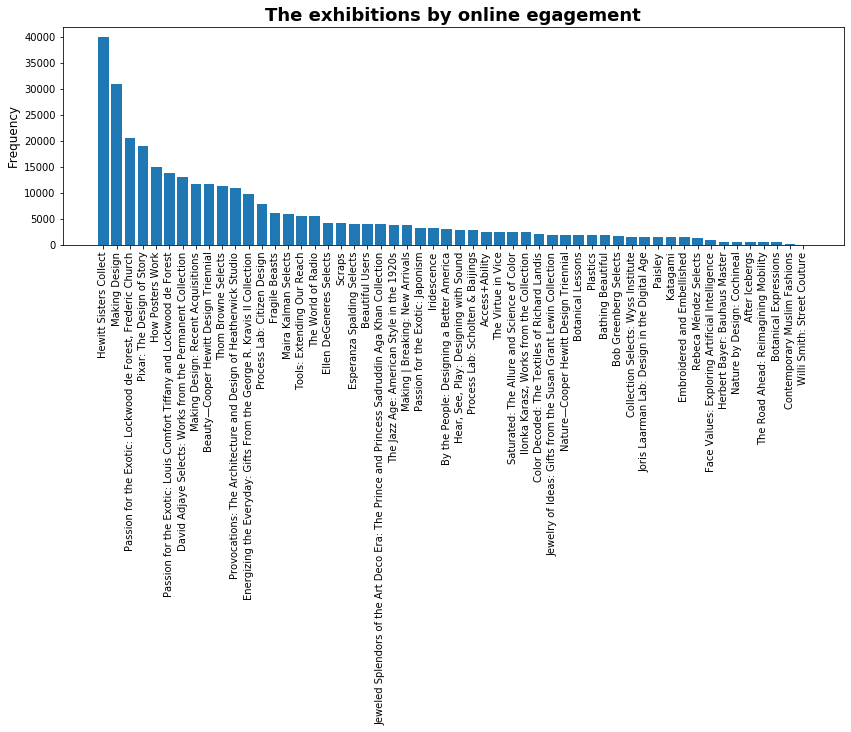

In [182]:
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(activity_visits_no_zero['exhibition_info']).value_counts().index,
        to_1D(activity_visits_no_zero['exhibition_info']).value_counts().values)
plt.xticks(rotation=90)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Exhibition Title", size = 14)
plt.title('The exhibitions by online egagement', fontdict={'fontweight': 'bold', 'fontsize':18})
# plt.savefig('exhibition_visitItems.png', dpi=300)

# how many collected?

In [59]:
activity_collected = activity_visits[activity_visits['count_items'] != 0]

In [60]:
visit_activity_collected = activity_collected[~activity_collected['visit_id'].duplicated()]

In [61]:
visit_activity_collected['visit_id'].count()

229315

In [63]:
activity_collected

,visit_id,created_activity,count_items,shortcode,user_id,created_visits
0,1509661,2014-12-15 10:52:19-05:00,7.0,sx6w,0,2014-12-15 14:48:33
1,1509661,2014-12-15 16:42:02-05:00,4.0,sx6w,0,2014-12-15 14:48:33
2,1509665,2014-12-15 10:56:30-05:00,6.0,cwzn,0,2014-12-15 14:49:47
3,1509665,2014-12-15 16:45:35-05:00,8.0,cwzn,0,2014-12-15 14:49:47
4,1509665,2015-01-07 14:24:55-05:00,20.0,cwzn,0,2014-12-15 14:49:47
...,...,...,...,...,...,...
402037,132770929,2020-07-01 14:22:44-04:00,1.0,Jtmx,0,2020-07-01 17:55:07
402038,132770927,2020-07-01 17:09:54-04:00,1.0,ykcb7,0,2020-07-01 17:52:52
402039,132770927,2020-07-01 17:17:27-04:00,1.0,ykcb7,0,2020-07-01 17:52:52
402040,132777659,2020-07-02 13:19:11-04:00,1.0,ppkxy,28814,2020-07-02 17:15:41


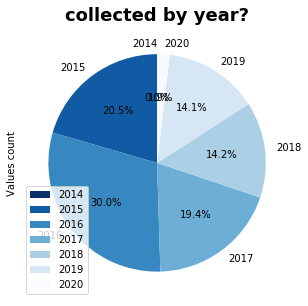

In [68]:
visit_activity_collected_year = visit_activity_collected['created_visits'].groupby(visit_activity_collected.created_visits.dt.to_period("Y")).agg('count')

plt.figure(figsize=(8,5))
visit_activity_collected_year.plot.pie(y='created_visits', figsize=(5, 5),autopct='%1.1f%%', startangle=90, cmap='Blues_r')
plt.title('collected by year?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()
# plt.savefig('yearly_didnothing.png', dpi=300)

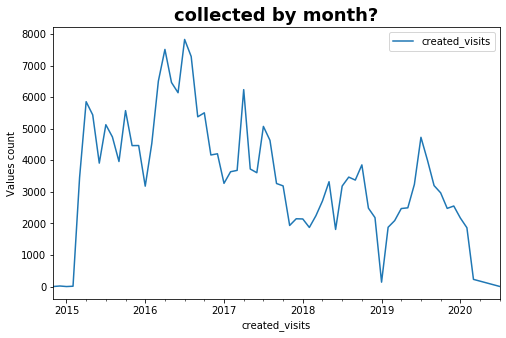

In [69]:
visit_activity_collected_month = visit_activity_collected['created_visits'].groupby(visit_activity_collected.created_visits.dt.to_period("M")).agg('count')

plt.figure(figsize=(8,5))
visit_activity_collected_month.plot()
plt.title('collected by month?', fontdict={'fontweight': 'bold', 'fontsize':18})
plt.ylabel('Values count')
plt.legend()

In [212]:
visit_activity_collected_month.nlargest()

date_start
2016-07    19331
2016-04    18114
2016-05    17032
2016-08    16557
2016-03    16322
Freq: M, Name: date_start, dtype: int64

NameError: name 'visit_activity_zero_month' is not defined

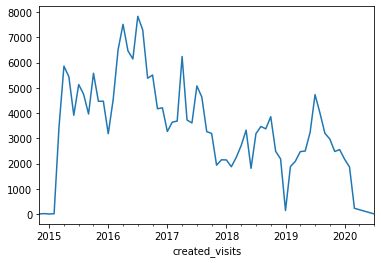

In [70]:
visit_activity_collected_month.plot()
visit_activity_zero_month.plot()
plt.legend(['collected', 'did_nothing'])
plt.title('collected Vs. did nothing', fontdict={'fontweight': 'bold', 'fontsize':18})